In [1]:
import keras_cv
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt


Using TensorFlow backend


In [25]:
model = keras_cv.models.StableDiffusion(img_width=512, img_height=512, jit_compile=False)

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE


<tf.Tensor: shape=(512, 512, 3), dtype=int16, numpy=
array([[[197, 174, 133],
        [196, 173, 132],
        [195, 172, 130],
        ...,
        [192, 168, 104],
        [187, 166, 103],
        [186, 164, 103]],

       [[199, 175, 137],
        [198, 174, 136],
        [196, 173, 133],
        ...,
        [190, 166, 105],
        [189, 165, 101],
        [189, 165, 103]],

       [[200, 176, 138],
        [198, 174, 136],
        [197, 173, 135],
        ...,
        [188, 164, 102],
        [188, 164, 102],
        [186, 162,  98]],

       ...,

       [[207, 175, 149],
        [225, 199, 169],
        [226, 199, 170],
        ...,
        [236, 206, 169],
        [229, 200, 166],
        [211, 182, 146]],

       [[244, 214, 180],
        [233, 200, 167],
        [215, 185, 157],
        ...,
        [234, 199, 160],
        [234, 200, 163],
        [228, 195, 154]],

       [[238, 212, 177],
        [226, 200, 167],
        [222, 193, 163],
        ...,
        [232, 200, 16

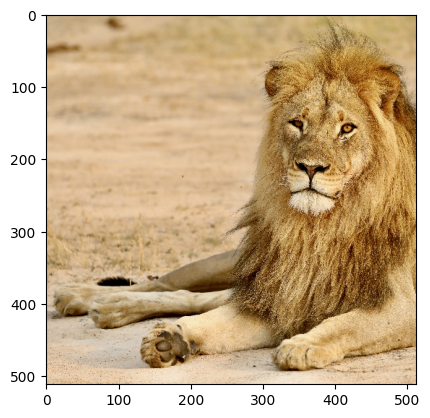

In [3]:

from utils import crop_and_scale_image, show_image, get_image, normalize_m1to1, normalize_0to1

img_path = r"C:\Users\aapolina\CODE\diffusion_segmentation\images\lion_savannah.jpeg"

image = crop_and_scale_image(get_image(img_path))

plt.imshow(image)
image

In [4]:
#image = normalize_m1to1(image)
image = normalize_0to1(image)
images = tf.expand_dims(image, axis=0) # encoder expects a tensor of shape (batch_size, height, width, channels) so we add a batch dimension


<tf.Tensor: shape=(1, 512, 512, 3), dtype=float32, numpy=
array([[[[0.7725491 , 0.68235296, 0.52156866],
         [0.7686275 , 0.6784314 , 0.5176471 ],
         [0.76470596, 0.6745098 , 0.50980395],
         ...,
         [0.75294125, 0.65882355, 0.40784317],
         [0.73333335, 0.6509804 , 0.4039216 ],
         [0.7294118 , 0.6431373 , 0.4039216 ]],

        [[0.7803922 , 0.6862745 , 0.5372549 ],
         [0.77647066, 0.68235296, 0.53333336],
         [0.7686275 , 0.6784314 , 0.52156866],
         ...,
         [0.74509805, 0.6509804 , 0.41176474],
         [0.7411765 , 0.64705884, 0.39607847],
         [0.7411765 , 0.64705884, 0.4039216 ]],

        [[0.7843138 , 0.6901961 , 0.5411765 ],
         [0.77647066, 0.68235296, 0.53333336],
         [0.7725491 , 0.6784314 , 0.5294118 ],
         ...,
         [0.7372549 , 0.6431373 , 0.40000004],
         [0.7372549 , 0.6431373 , 0.40000004],
         [0.7294118 , 0.63529414, 0.38431376]],

        ...,

        [[0.8117648 , 0.6862745 , 

In [55]:
image_encoder = model.image_encoder
#image_encoder.summary()


In [56]:
image_encoded_latent = image_encoder(images, training=False)

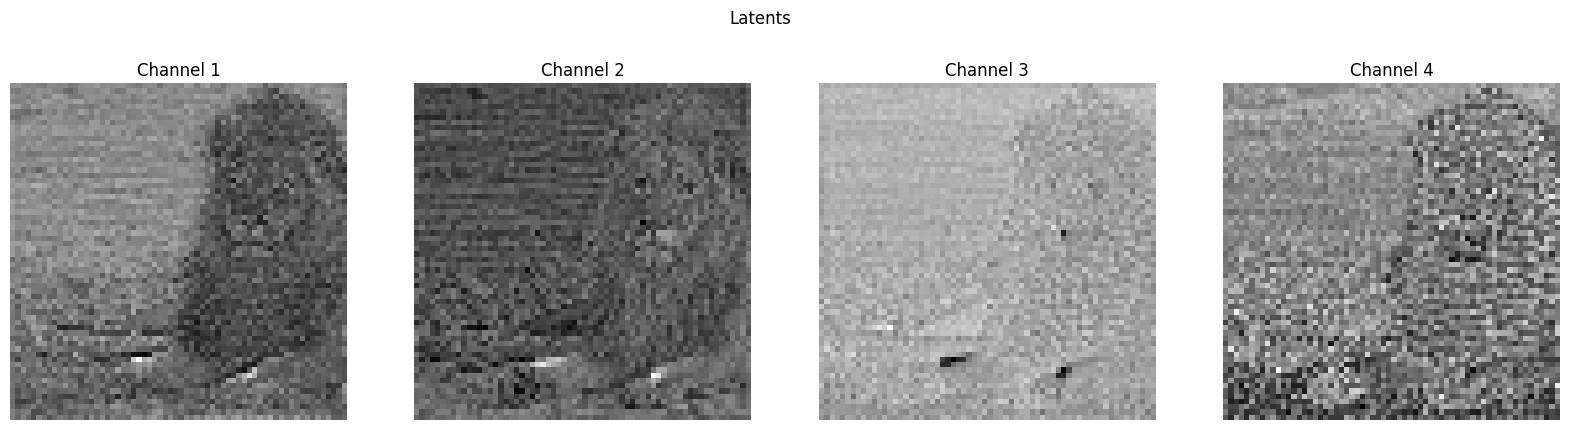

In [57]:

# Plotting the latents
fig, axs = plt.subplots(1, 4, figsize=(20, 5))  # 1 row, 4 columns

# Loop over each channel
for i in range(4):
    channel = image_encoded_latent[0, :, :, i]
    axs[i].imshow(channel, cmap="gray")
    axs[i].set_title(f"Channel {i+1}")
    axs[i].axis("off")  # Hide axis

fig.suptitle("Latents")
plt.show()

In [58]:
image_decoder = model.decoder #64x64x4 --> 512x512x3    
image_decoder.summary()

Model: "decoder_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 64, 64, 4)         0         
                                                                 
 padded_conv2d_266 (PaddedC  (None, 64, 64, 4)         20        
 onv2D)                                                          
                                                                 
 padded_conv2d_267 (PaddedC  (None, 64, 64, 512)       18944     
 onv2D)                                                          
                                                                 
 resnet_block_34 (ResnetBlo  (None, 64, 64, 512)       4721664   
 ck)                                                             
                                                                 
 attention_block_3 (Attenti  (None, 64, 64, 512)       1051648   
 onBlock)                                                

In [59]:
image_decoded = image_decoder(image_encoded_latent, training=False)
image_decoded

<tf.Tensor: shape=(1, 512, 512, 3), dtype=float32, numpy=
array([[[[0.73248565, 0.6640194 , 0.54451716],
         [0.77106494, 0.6703736 , 0.5397521 ],
         [0.75647944, 0.67270154, 0.55162776],
         ...,
         [0.72542566, 0.6428117 , 0.40114138],
         [0.7318902 , 0.64737016, 0.42422327],
         [0.747207  , 0.6770908 , 0.42642188]],

        [[0.7679028 , 0.67557526, 0.55264837],
         [0.75038713, 0.67158777, 0.5646503 ],
         [0.75290066, 0.6732321 , 0.55461234],
         ...,
         [0.7137219 , 0.6433558 , 0.4145182 ],
         [0.72277546, 0.6383966 , 0.41516134],
         [0.75375646, 0.6534344 , 0.42431095]],

        [[0.76132864, 0.66969854, 0.55940735],
         [0.75985354, 0.67937326, 0.5549743 ],
         [0.74733543, 0.6724491 , 0.5350742 ],
         ...,
         [0.718389  , 0.6371156 , 0.41023365],
         [0.71323735, 0.64179075, 0.40113968],
         [0.74991804, 0.65663743, 0.4206931 ]],

        ...,

        [[0.93673235, 0.85485333, 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


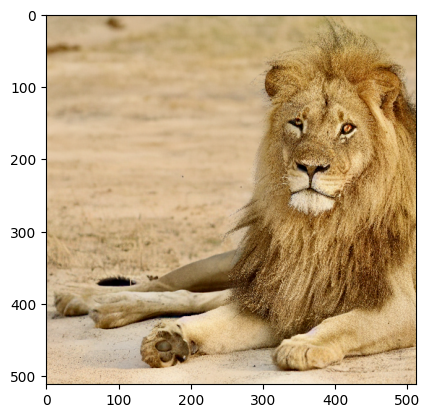

In [60]:
plt.imshow(image_decoded[0])    

In [61]:
text_encoder = model.text_encoder
text_encoder.summary()

Model: "text_encoder_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 tokens (InputLayer)         [(None, 77)]                 0         []                            
                                                                                                  
 positions (InputLayer)      [(None, 77)]                 0         []                            
                                                                                                  
 clip_embedding_1 (CLIPEmbe  (None, 77, 768)              3800448   ['tokens[0][0]',              
 dding)                                                   0          'positions[0][0]']           
                                                                                                  
 clip_encoder_layer_12 (CLI  (None, 77, 768)              7087872   ['clip_embedding_

In [62]:
tokenizer = model.tokenizer
tokenizer

In [63]:
prompt = ""
tokens = tokenizer.encode(prompt)
tokens

[49406, 49407]

In [64]:
tokens = tokens + [49407] * (77 - len(tokens)) #fill up with padding tokens so that the length is 77

In [65]:
model._get_pos_ids()

<tf.Tensor: shape=(1, 77), dtype=int32, numpy=
array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
        32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
        48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
        64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]])>

In [66]:
text_encoder_inputs = tf.expand_dims(tokens, 0) # encoder expects a tensor of shape (batch_size, seq_length) so we add a batch dimension

context = text_encoder.predict_on_batch({"tokens": text_encoder_inputs, "positions": model._get_pos_ids()})
context

array([[[-0.3883766 ,  0.02294355, -0.05219658, ..., -0.4898829 ,
         -0.30660194,  0.0674539 ],
        [-0.37112132, -1.4496567 , -0.3401137 , ...,  0.9488632 ,
          0.18672359, -1.1034379 ],
        [-0.51073885, -1.4628798 , -0.29255486, ...,  1.0419046 ,
          0.07005873, -1.0284145 ],
        ...,
        [ 0.5005952 , -0.9552322 , -0.66102755, ...,  1.6012928 ,
         -1.0622205 , -0.21908388],
        [ 0.4988123 , -0.94508827, -0.66560864, ...,  1.6466699 ,
         -1.0858374 , -0.20878038],
        [ 0.49234897, -0.8124451 , -0.49119183, ...,  1.6107702 ,
         -1.0173548 , -0.24837863]]], dtype=float32)

In [67]:
#keras_cv.models.stable_diffusion.DiffusionModel
ldm = model.diffusion_model

In [68]:
ldm.summary()

Model: "diffusion_model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 timestep_embedding (InputL  [(None, 320)]                0         []                            
 ayer)                                                                                            
                                                                                                  
 dense_512 (Dense)           (None, 1280)                 410880    ['timestep_embedding[0][0]']  
                                                                                                  
 latent (InputLayer)         [(None, 64, 64, 4)]          0         []                            
                                                                                                  
 activation_140 (Activation  (None, 1280)                 0         ['dense_512[0]

c:\Users\aapolina\Anaconda3\envs\diffseg\lib\site-packages\keras\src\utils\layer_utils.py:146: RuntimeWarning: overflow encountered in scalar add
  total_memory_size += weight_shape * per_param_size


In [69]:
timestep = 1
t_emb = model._get_timestep_embedding(timestep=timestep, batch_size=1)
t_emb

<tf.Tensor: shape=(1, 320), dtype=float32, numpy=
array([[5.40302277e-01, 5.86503804e-01, 6.28439426e-01, 6.66423202e-01,
        7.00764120e-01, 7.31760979e-01, 7.59699225e-01, 7.84848988e-01,
        8.07463169e-01, 8.27777207e-01, 8.46009135e-01, 8.62359643e-01,
        8.77012730e-01, 8.90136719e-01, 9.01884675e-01, 9.12395835e-01,
        9.21796441e-01, 9.30200577e-01, 9.37711358e-01, 9.44421649e-01,
        9.50415254e-01, 9.55767453e-01, 9.60545778e-01, 9.64811027e-01,
        9.68617678e-01, 9.72014427e-01, 9.75045145e-01, 9.77748811e-01,
        9.80160594e-01, 9.82311726e-01, 9.84230220e-01, 9.85941172e-01,
        9.87466812e-01, 9.88827288e-01, 9.90040243e-01, 9.91121769e-01,
        9.92085993e-01, 9.92945611e-01, 9.93711948e-01, 9.94395137e-01,
        9.95004177e-01, 9.95547056e-01, 9.96030986e-01, 9.96462345e-01,
        9.96846855e-01, 9.97189641e-01, 9.97495115e-01, 9.97767389e-01,
        9.98010099e-01, 9.98226464e-01, 9.98419285e-01, 9.98591125e-01,
        9.9874

In [72]:
images_latent = tf.expand_dims(image_encoded_latent, axis=0)
images_latent

<tf.Tensor: shape=(1, 1, 64, 64, 4), dtype=float32, numpy=
array([[[[[ 1.8103261 ,  1.0558431 , -0.19544193, -0.43623877],
          [ 1.9405364 ,  0.96325415, -0.46074802, -0.34920186],
          [ 1.6104234 ,  1.2464789 , -0.06353755, -0.17227149],
          ...,
          [ 1.6822876 ,  1.2747207 , -0.33863494, -0.1036777 ],
          [ 1.552602  ,  1.0211389 , -0.08405405,  0.04435894],
          [ 1.1623571 ,  1.679346  , -0.1191395 , -0.22479525]],

         [[ 1.429709  ,  1.2653413 , -0.2358886 , -0.32111982],
          [ 1.2402385 ,  0.69792676,  0.02096415, -0.4390594 ],
          [ 1.6404884 ,  0.58451384,  0.10359083, -0.03835145],
          ...,
          [ 1.9426725 ,  1.0194148 ,  0.32310185,  0.29531115],
          [ 1.8717571 ,  0.4436312 ,  0.1232141 , -0.31308347],
          [ 1.6193105 ,  1.1298796 ,  0.43131614, -0.20251293]],

         [[ 1.9407338 ,  1.0872787 , -0.44095424, -0.13962312],
          [ 1.5788516 ,  0.8988237 ,  0.24321462, -0.53636324],
          [

In [73]:
output = ldm.predict_on_batch({'latent':image_encoded_latent, 
                      'timestep_embedding':t_emb, 
                      'context':context})     

In [75]:
output.shape # (1, 64, 64, 4)

(1, 64, 64, 4)